In [71]:
import pandas as pd
import numpy as np
df = pd.read_csv('treino_alunos_notas.csv')
df
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nome    15 non-null     object 
 1   curso   15 non-null     object 
 2   cidade  14 non-null     object 
 3   escola  15 non-null     object 
 4   notas   13 non-null     float64
dtypes: float64(1), object(4)
memory usage: 732.0+ bytes


In [77]:
#Tratamento de Dados

df_Analise = df
df_Analise["notas"] = df_Analise["notas"].fillna(0)
df_Analise["cidade"] = df_Analise["cidade"].fillna("Desconhecido")
df_Analise = df[["nome", "curso", "cidade", "escola", "notas"]]
df_Analise["nome"] = df_Analise["nome"].str.title().str.strip()
df_Analise["curso"] = df_Analise["curso"].str.title().str.strip()
df_Analise["cidade"] = df_Analise["cidade"].str.title().str.strip()
df_Analise["escola"] = df_Analise["escola"].str.title().str.strip()
df_Analise = df_Analise.rename(columns={"notas": "notas primeiro semestre"})
df_Analise




,nome,curso,cidade,escola,notas primeiro semestre
0,Ana Silva,Direito,Salvador,Instituto Federal C,7.6
1,Bruno Souza,Computação,Curitiba,Colégio Particular B,8.8
2,Carla Oliveira,Engenharia,São Paulo,Escola Estadual A,0.0
3,Diego Santos,Direito,Salvador,Instituto Federal C,9.5
4,Elena Pereira,Administração,Curitiba,Instituto Federal C,5.9
5,Fabio Lima,Computação,São Paulo,Instituto Federal C,4.5
6,Gisele Costa,Direito,Curitiba,Colégio Particular B,5.8
7,Hugo Ferreira,Engenharia,Desconhecido,Escola Estadual A,4.7
8,Isabela Rocha,Direito,Rio De Janeiro,Colégio Particular B,9.0
9,João Almeida,Medicina,São Paulo,Escola Municipal D,4.3


In [78]:
#Preenchimento de notas
NotasSegundoSemetre = [4.5, 5.8, 7.8, 9.5, 5.9, 4.5, 9.0, 4.3, 7.3, 7.3, 5.2, 9.1, 4.6, 4.7,9.2]#15 Notas
df_notas = df_Analise["notas primeiro semestre"].values
if len(df_notas) == len(NotasSegundoSemetre):
    df_Analise["notas segundo semestre"] = NotasSegundoSemetre
else:
    print("ERRO")

df_Analise


,nome,curso,cidade,escola,notas primeiro semestre,notas segundo semestre
0,Ana Silva,Direito,Salvador,Instituto Federal C,7.6,4.5
1,Bruno Souza,Computação,Curitiba,Colégio Particular B,8.8,5.8
2,Carla Oliveira,Engenharia,São Paulo,Escola Estadual A,0.0,7.8
3,Diego Santos,Direito,Salvador,Instituto Federal C,9.5,9.5
4,Elena Pereira,Administração,Curitiba,Instituto Federal C,5.9,5.9
5,Fabio Lima,Computação,São Paulo,Instituto Federal C,4.5,4.5
6,Gisele Costa,Direito,Curitiba,Colégio Particular B,5.8,9.0
7,Hugo Ferreira,Engenharia,Desconhecido,Escola Estadual A,4.7,4.3
8,Isabela Rocha,Direito,Rio De Janeiro,Colégio Particular B,9.0,7.3
9,João Almeida,Medicina,São Paulo,Escola Municipal D,4.3,7.3


In [79]:
#Filtra media dos alunos,media por escola  e agrupar os com os maiores ranks e mostrar os aprovado e reprovado
df_Analise["media"] = (df_Analise["notas primeiro semestre"] + df_Analise["notas segundo semestre"]) / 2
df_Analise["Aprovados"] = np.where(df_Analise["media"] >= 6, "Aprovado", "Reprovado")
df_Analise
df_MediaPorEscola = df_Analise[["escola","media"]].groupby("escola").mean().round(2)
df_MediaPorEscola


,media
escola,
Colégio Particular B,7.70
Escola Estadual A,5.53
Escola Municipal D,4.05
Instituto Federal C,6.18


In [80]:
df_Analises = df_Analise[["nome","curso","cidade","escola","media","Aprovados","notas primeiro semestre","notas segundo semestre"]]
import numpy as np
df_conselho = df_Analises[["nome", "media"]].copy()

df_conselho["conselho"] = np.where(
    df_conselho["media"] < 4,
    "Precisa de reforço",
    "Desempenho adequado"
)

df_Analises = df_Analises.sort_values("media", ascending=False)
df_Analises.reset_index(drop=True)
df_conselho

,nome,media,conselho
0,Ana Silva,6.05,Desempenho adequado
1,Bruno Souza,7.30,Desempenho adequado
2,Carla Oliveira,3.90,Precisa de reforço
3,Diego Santos,9.50,Desempenho adequado
4,Elena Pereira,5.90,Desempenho adequado
5,Fabio Lima,4.50,Desempenho adequado
6,Gisele Costa,7.40,Desempenho adequado
7,Hugo Ferreira,4.50,Desempenho adequado
8,Isabela Rocha,8.15,Desempenho adequado
9,João Almeida,5.80,Desempenho adequado


<Axes: xlabel='nome'>

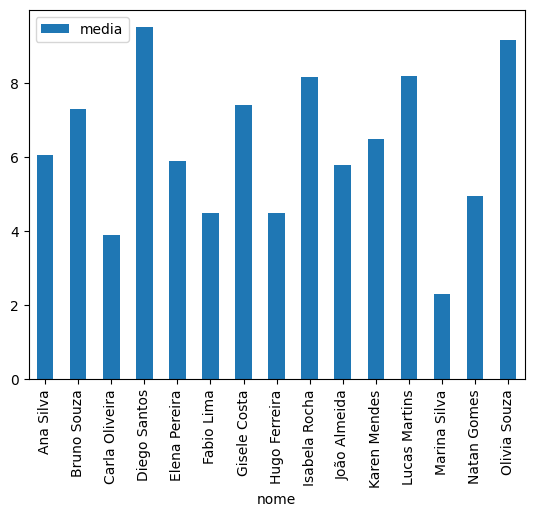

In [81]:
df_Analise.plot(x="nome", y="media", kind="bar")
